<a href="https://colab.research.google.com/github/JerryLiu789/titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_01%EF%BC%9A%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#環境準備


In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')

#Titanic 資料欄位定義

In [2]:
# PassengerId：乘客編號
# survival：是否生存，0:死亡 1:生存。
# pclass：社會經濟地位替代指標，1:高 2:中 3:低。
# sex：性別， 0:女性 1:男性
# Age：年齡。
# sibsp：在鐵達尼號上兄弟姊妹或配偶的數量。
# parch：在鐵達尼號上父母或小孩的數量。
# ticket：船票編號。
# fare：乘客票價。
# cabin：艙位編號。
# embarked：登船港口, C = Cherbourg, Q = Queenstown, S = Southampton。

#資料前處理

In [3]:
# 確認資料狀況
print(df.describe())
print('-'*60)
print(df.info())
print('-'*60)
print(df.isnull().sum())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
------------------------------------------------------------
<class 'pandas.core.

In [4]:
# 缺失值處理

# Age缺失值以性別區分，分別用該性別平均值填充
df['Age'].fillna(value=df.groupby('Sex')['Age'].transform('mean'),inplace=True)

# 找出Embarked的眾數，並以眾數填充缺失值
print(df['Embarked'].mode())
df['Embarked'].fillna('S',inplace=True)

# Cabin 缺值值過多，刪除Cabin欄位
df = df.drop('Cabin',axis=1)

# 再次檢查缺失值是否已都填充
print(df.info())


0    S
Name: Embarked, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


In [5]:
# 類別欄位轉換為數值欄位

# Sex欄位以Labelencoding進行轉換
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Embarked欄位以One-hot-encoding進行轉換
df_onehotencoded = pd.get_dummies(df, columns=['Embarked'])
df_onehotencoded

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,27.915709,1,2,W./C. 6607,23.4500,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,True,False,False


In [6]:
# 取出最終要分析的欄位
df_analysis = df_onehotencoded[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked_C','Embarked_Q','Embarked_S']]
df_analysis

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,7.2500,False,False,True
1,1,1,0,38.000000,1,0,71.2833,True,False,False
2,1,3,0,26.000000,0,0,7.9250,False,False,True
3,1,1,0,35.000000,1,0,53.1000,False,False,True
4,0,3,1,35.000000,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,False,False,True
887,1,1,0,19.000000,0,0,30.0000,False,False,True
888,0,3,0,27.915709,1,2,23.4500,False,False,True
889,1,1,1,26.000000,0,0,30.0000,True,False,False


# 關聯性分析與視覺化

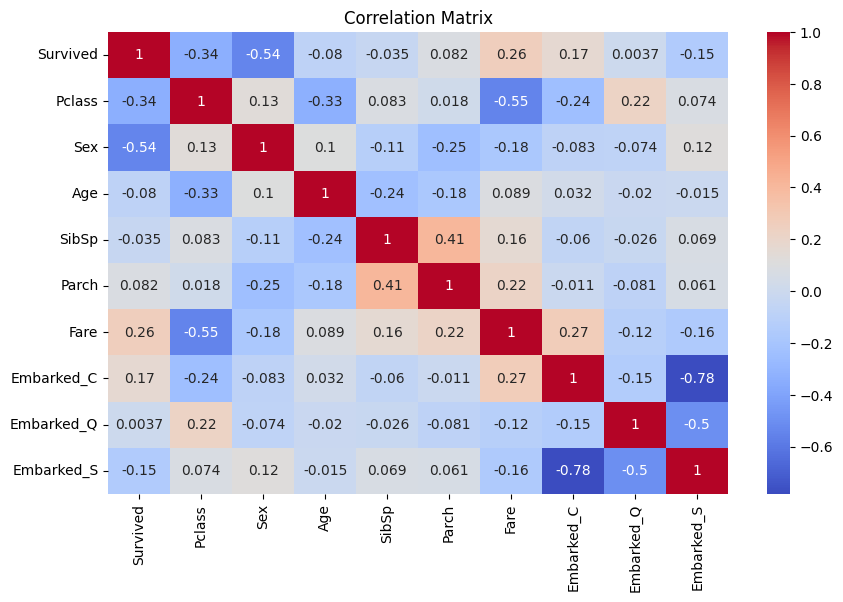

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 使用皮爾森相關係數來計算相關係數矩陣
correlation_matrix = df_analysis.corr()

# 繪製相關係數矩陣熱圖
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 建立第一個 Baseline 版本


In [8]:
df_train = df_analysis

columns_X = list(set(df_train.columns) - {'Survived'})
columns_y = ['Survived']


train_X = df_train[columns_X]
train_y = df_train[columns_y]


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)
print(scores.mean())
print(scores.std())

[0.78212291 0.78651685 0.78651685 0.76966292 0.8258427 ]
0.7901324461741259
0.018891909369072993


# 測試用不同方式填補 Age 缺失值，對模型評分的影響

In [9]:
df_test = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')

# 以眾數填充 Embarked 缺失值
df_test['Embarked'].fillna('S',inplace=True)

# Cabin 缺值值過多，刪除Cabin欄位
df_test = df_test.drop('Cabin',axis=1)

# Sex欄位以Labelencoding進行轉換
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_test['Sex'] = label_encoder.fit_transform(df_test['Sex'])

# Embarked欄位以One-hot-encoding進行轉換
df_onehotencoded_test = pd.get_dummies(df_test, columns=['Embarked'])

# 取出最終要分析的欄位
df_analysis_test = df_onehotencoded_test[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked_C','Embarked_Q','Embarked_S']]


# 建立七種不同方法做缺失值填補測試

# test1：Age缺失值以性別區分，分別用該性別平均值填充(原方法)
df_test1 = df_analysis_test.copy()
df_test1['Age'].fillna(value=df_test1.groupby('Sex')['Age'].transform('mean'),inplace=True)

# test2：以Age欄位的平均數做填補
df_test2 = df_analysis_test.copy()
df_test2['Age'] = df_test2['Age'].fillna(df['Age'].mean())

# test3：以數值0來填補缺失值
df_test3 = df_analysis_test.copy()
df_test3['Age'] = df_test3['Age'].fillna(0)

# test4：以Age欄位的中位數做填補缺失值
df_test4 = df_analysis_test.copy()
df_test4['Age'] = df_test4['Age'].fillna(df['Age'].median())

# test5：以Age欄位的眾數做填補缺失值
df_test5 = df_analysis_test.copy()
df_test5['Age'] = df_test5['Age'].fillna(df['Age'].mode()[0])


# test6：以線性插值法做填補缺失值
df_test6 = df_analysis_test.copy()
df_test6['Age'] = df_test6['Age'].interpolate()

# test7：以機器學習KNN算法做填補缺失值
from sklearn.impute import KNNImputer
df_test7 = df_analysis_test.copy()
imputer = KNNImputer(n_neighbors=2)
df_test7[['Age']] = imputer.fit_transform(df_test7[['Age']])


# 建立測試迴圈欲使用的資料集
test_data = [df_test1,df_test2,df_test3,df_test4,df_test5,df_test6,df_test7]

# # 建立測試迴圈
number = 1
loc_num = 0
fillna_test = pd.DataFrame(columns=['測試序', 'CV平均', '標準差'])

for i in test_data:
    columns_X_test = list(set(i.columns) - {'Survived'})
    columns_y_test = ['Survived']

    train_X_test = i[columns_X_test]
    train_y_test = i[columns_y_test]

    log_test = LogisticRegression(random_state=0, max_iter=3000)
    scores_test = cross_val_score(log_test, train_X_test, train_y_test.values.ravel(),cv=5,scoring='accuracy')

    fillna_test.loc[loc_num] = [number,scores_test.mean(),scores_test.std()]
    number += 1
    loc_num += 1

fillna_test['方法備註'] = ['性別平均值','平均數','0','中位數','眾數','線性插值','KNN']
fillna_test

,測試序,CV平均,標準差,方法備註
0,1.0,0.790132,0.018892,性別平均值
1,2.0,0.789009,0.019237,平均數
2,3.0,0.785613,0.025135,0
3,4.0,0.789009,0.019237,中位數
4,5.0,0.789009,0.019237,眾數
5,6.0,0.784540,0.019948,線性插值
6,7.0,0.789009,0.019237,KNN


結論：測試7種不同方式填補缺失值，原填補方法最優

# 觀察包含缺失值之性別、年齡與生存關係

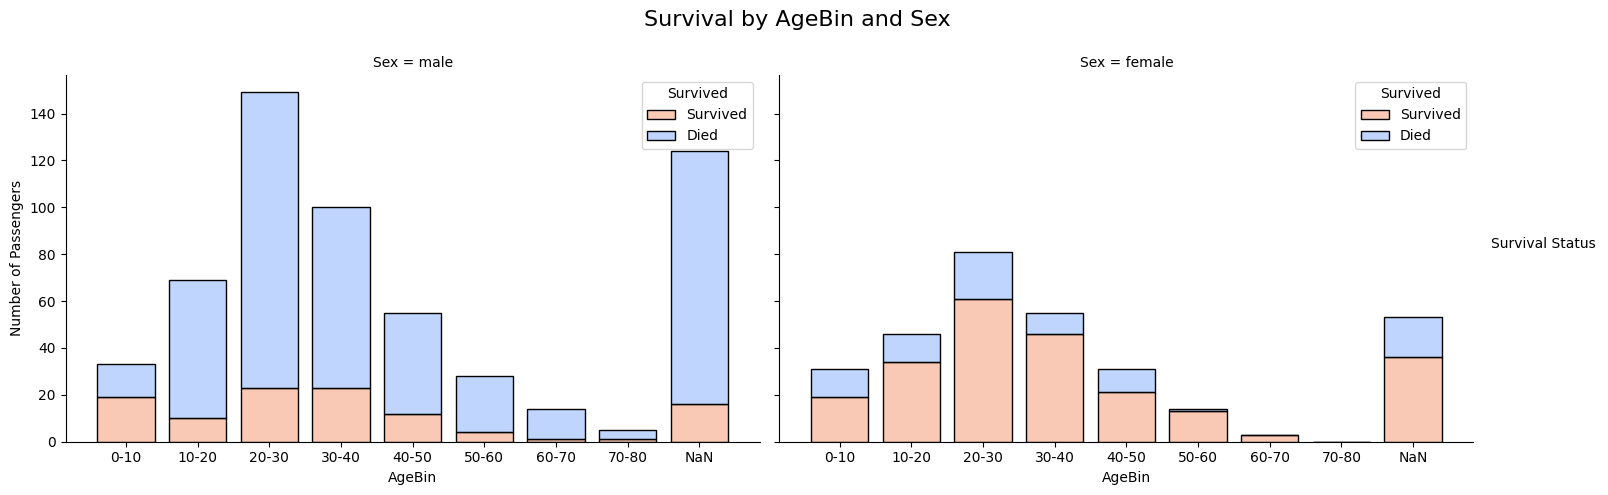

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_test2 = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')

# 將年齡進行分箱 (Binning)
df_test2['AgeBin'] = pd.cut(df_test2['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

# 將 NaN 值單獨標註為一個類別
df_test2['AgeBin'] = df_test2['AgeBin'].cat.add_categories('NaN')
df_test2['AgeBin'].fillna('NaN', inplace=True)

# 使用 FacetGrid 按性別分面
g = sns.FacetGrid(df_test2, col="Sex", height=5, aspect=1.5)

# 在網格中繪製生存和死亡的堆疊直方圖
g.map_dataframe(sns.histplot, x="AgeBin", hue="Survived", multiple="stack", palette="coolwarm", shrink=.8)

# 添加標題和調整佈局
g.set_axis_labels("AgeBin", "Number of Passengers")
g.add_legend(title="Survival Status")

# 調整圖例位置（例如在右上角）
for ax in g.axes.flat:
    ax.legend(loc='upper right', title="Survived", labels=['Survived','Died'])

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Survival by AgeBin and Sex", fontsize=16)

plt.show()

結論：以性別為分組，缺失值的年齡之生存狀態與20-30之間的生存比例類似

# 觀察Pclass=1、2的乘客，其年齡與生存關係

<ipython-input-11-d64256b230ef>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pclass_filtered['AgeBin'] = pd.cut(pclass_filtered['Age'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80],


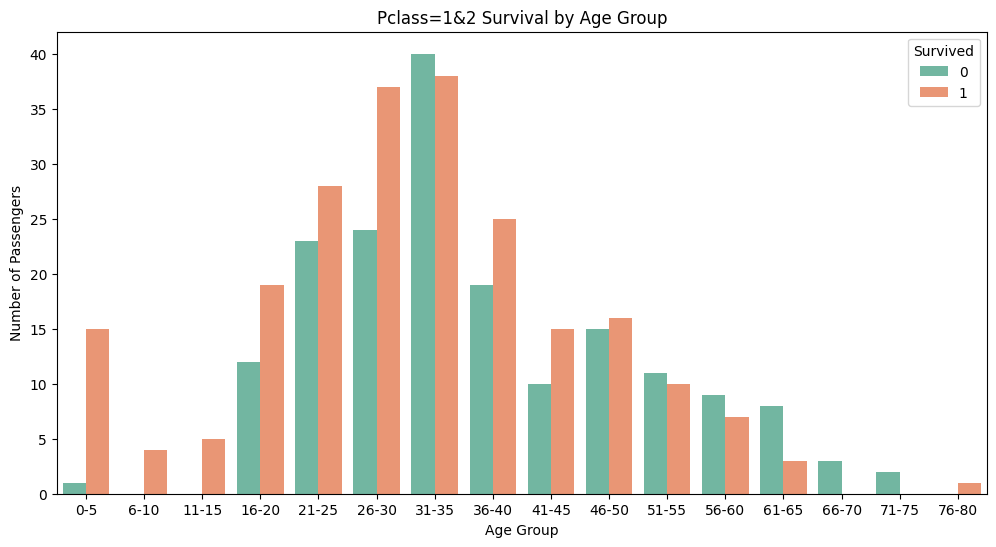

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


pclass_filtered = df_analysis[(df_analysis['Pclass'] == 1) | (df_analysis['Pclass'] == 2)]

# 將 Age 分箱
pclass_filtered['AgeBin'] = pd.cut(pclass_filtered['Age'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80],
                                   labels=['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76-80'])

# 設定繪圖大小
plt.figure(figsize=(12, 6))

# 繪製長條圖，顯示 AgeBin 與 Survived 之間的關係
sns.countplot(data=pclass_filtered, x='AgeBin', hue='Survived', palette='Set2')

# 添加標題和標籤
plt.title('Pclass=1&2 Survival by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')

# 顯示圖例
plt.legend(title='Survived', loc='best')

# 顯示圖表
plt.show()


結論：針對Pclass=1&2的資料做年齡與生存關係的觀察，生存狀況明顯優於整體數據，以此來創建新特徵

# 創建新特徵

In [18]:
# 創建新特徵
# 特徵條件：
# Pclass=1、2，年齡小於16，賦予標籤'0'
# Pclass=1、2，年齡大於31、小於35，賦予標籤'1'
# Pclass=1、2，年齡大於35，賦予標籤'2'
# Pclass=3，賦予標籤'4'

# 定義條件
conditions = [
    ((df_analysis['Pclass'] == 1) | (df_analysis['Pclass'] == 2)) & (df_analysis['Age'] < 16),
    ((df_analysis['Pclass'] == 1) | (df_analysis['Pclass'] == 2)) & (df_analysis['Age'] > 31) & (df_analysis['Age'] < 35),
    ((df_analysis['Pclass'] == 1) | (df_analysis['Pclass'] == 2))
]

# 定義對應的值
choices = [0, 1, 2]

# 新增 Ti_Pclass 特徵
df_analysis.loc[:, 'Ti_Pclass'] = np.select(conditions, choices, default=np.nan)
df_analysis.loc[:, 'Ti_Pclass'].fillna(4,inplace=True)

<ipython-input-18-99dcc11e725f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis.loc[:, 'Ti_Pclass'].fillna(4,inplace=True)


# 測試新特徵預測結果

In [20]:
df_train = df_analysis

columns_X = list(set(df_train.columns) - {'Survived'})
columns_y = ['Survived']


train_X = df_train[columns_X]
train_y = df_train[columns_y]


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)
print(scores.mean())
print(scores.std())

[0.80446927 0.81460674 0.79775281 0.79213483 0.85393258]
0.8125792480070304
0.02198989902049029


加入新的特徵，CV平均從0.79提升至0.81